# Homework 3
##

## Part 1 - Exploratory Data Analysis

####


Modules needed

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings





### 1.1 IRIS Data


Read data from file and display table


In [6]:

data_iris = pd.read_csv('IRIS.csv')

data_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:

#get statistics about the data
data_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


####
#### Visualize data in scatter plots

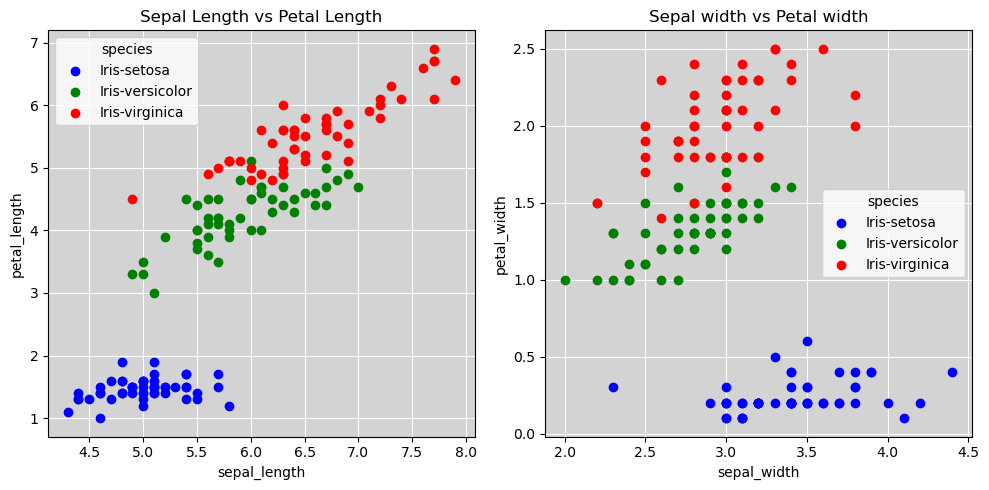

In [11]:

#create dictionary to assign color to each type of iris flower
colors = {"Iris-setosa": "blue", "Iris-versicolor": "green", "Iris-virginica": "red"}

#prepare for subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5)) 

#plot data for each species in same subplot 1
for species, color in colors.items():
    subset = data_iris[data_iris["species"] == species]
    
    axes[0].scatter(subset['sepal_length'], subset['petal_length'], label=species, color=color, zorder=4)
    axes[0].set_title("Sepal Length vs Petal Length")
    axes[0].set_xlabel("sepal_length")
    axes[0].set_ylabel("petal_length")
    axes[0].legend(title="species")
    axes[0].grid(True, color='white', zorder=0) 
    axes[0].set_facecolor("lightgrey")  

#plot data for each species in same subplot 2
for species, color in colors.items():
    subset = data_iris[data_iris['species'] == species]

    axes[1].scatter(subset['sepal_width'], subset['petal_width'], label=species, color=color, zorder=4)
    axes[1].set_title("Sepal width vs Petal width")
    axes[1].set_xlabel("sepal_width")
    axes[1].set_ylabel("petal_width")
    axes[1].legend(title="species")
    axes[1].grid(True, color='white', zorder=0)  
    axes[1].set_facecolor("lightgrey") 

# Insert padding between subplots to avoid overlap
plt.tight_layout()

plt.show()


#### Analysis from scatterplots

##### For the length:

It seems there is a linear positve correlation between petal length and sepal length for the case
of the species Iris-versicolor and Iris-virginica. Iris-virginica grows more in length. The ratio between petal length and sepal length is closer to 1.

In the case of species Iris-setosa, the petal length appears to stay more or less short
in relation to sepal length. The ratio varies approximately between 0.20 - 0.40.


##### For the width:

The petal width of Iris-setosa seems to be constant and short independently of the sepal width, while there is a greater variation for the Iris-versicolor and Iris-virginica.

###

#### Visualize data in boxplots


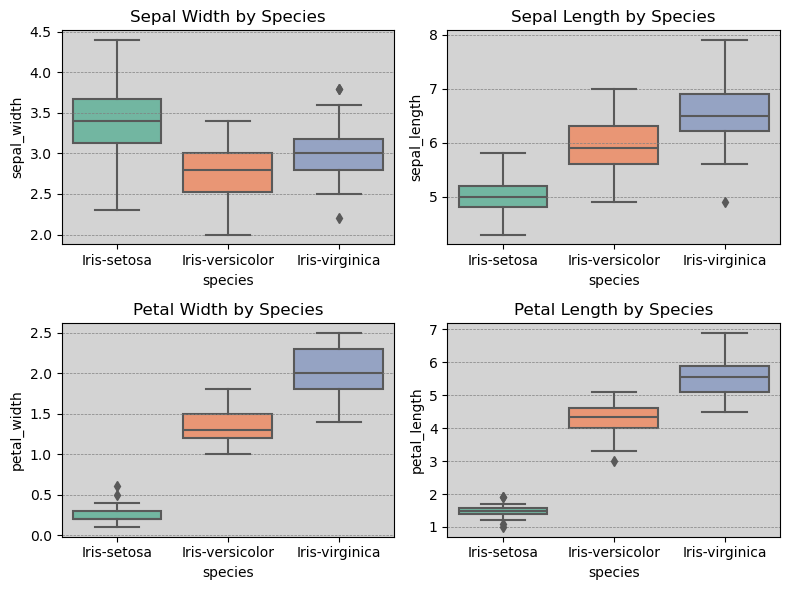

In [15]:


# Filter warnings
warnings.filterwarnings("ignore")

# Create figure with four subplots, 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Create boxplot for sepal_width
sns.boxplot(data=data_iris, x="species", y="sepal_width", ax=axes[0, 0], palette="Set2")
axes[0, 0].set_title("Sepal Width by Species")
axes[0, 0].set_facecolor("lightgrey") 
axes[0, 0].grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

# Create boxplot for sepal_length
sns.boxplot(data=data_iris, x="species", y="sepal_length", ax=axes[0, 1], palette="Set2")
axes[0, 1].set_title("Sepal Length by Species")
axes[0, 1].set_facecolor("lightgrey")  
axes[0, 1].grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

# Create boxplot for petal_width
sns.boxplot(data=data_iris, x="species", y="petal_width", ax=axes[1, 0], palette="Set2")
axes[1, 0].set_title("Petal Width by Species")
axes[1, 0].set_facecolor("lightgrey")  
axes[1, 0].grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)

# Creat boxplot for petal_length
sns.boxplot(data=data_iris, x="species", y="petal_length", ax=axes[1, 1], palette="Set2")
axes[1, 1].set_title("Petal Length by Species")
axes[1, 1].set_facecolor("lightgrey")  
axes[1, 1].grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)


# Lägg till padding mellan subplotarna
plt.tight_layout()

# Visa plotten
plt.show()

#### Analysis from boxplots

The distribution of the sepal width among each species appears to be relatively normally distributed with different medians and deviation. 

The median length is different in terms of sepal length and width for the three species - the Iris-setosa beeing the widest in sepal width whereas Iris-virginica beeing the longest. 

####

#### Visualize data in pairs plots

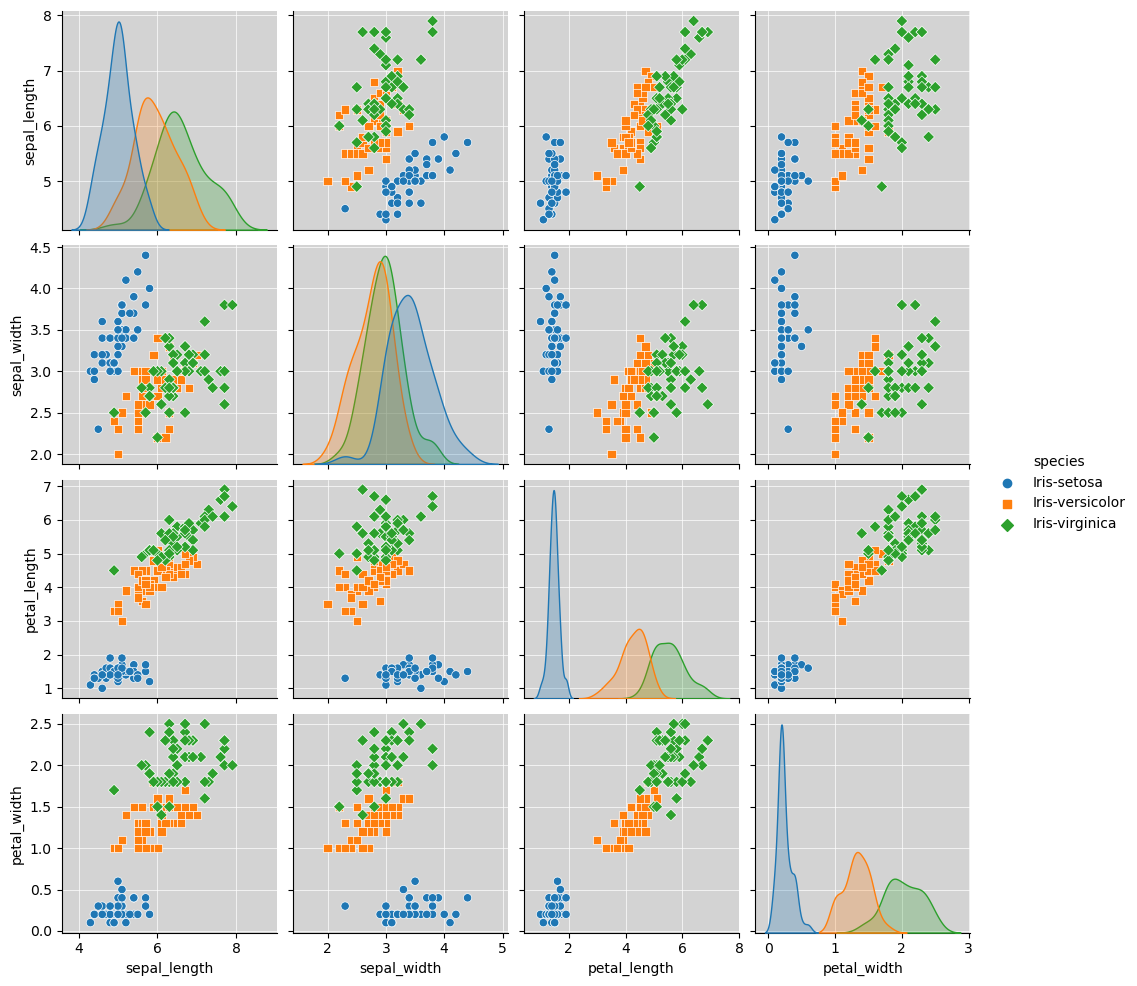

In [22]:
# Filter warnings
warnings.filterwarnings("ignore")

# Create pair plots
pair_plot = sns.pairplot(data_iris, hue='species', diag_kind='kde', markers=["o", "s", "D"])

# Add grid and background color
for ax in pair_plot.axes.flatten():
    ax.set_facecolor("lightgrey") 
    ax.grid(True, linestyle='-', color='white', linewidth=0.5, zorder=0)
    
     # make sure scatterpoints are brought to front of grid
    for c in ax.collections:
        c.set_zorder(5)
        
plt.show()
                        
# Reset warnings
warnings.resetwarnings()


#### Analysis from pair plots

For each species the length and width are approximately normally distributed. Iris-setosa beeing the shortest in petal width as well as petal length with small standard deviation. It seems that the petal length and width stay short while it can vary in sepal dimensions.

Iris-versicolor and Iris-virginica are basically similar in dimensions where there appears to be almost linear dependence between the petal width/ petal length, sepal length/ petal length

###

### 1.2 Birdwatching 

####

Read data and dispay

In [26]:

df_artport = pd.read_csv('artportalen.csv')

pd.set_option('display.max_columns', 50)

df_artport

,Id,Taxonsorteringsordning,Rödlistade,Artnamn,Vetenskapligt namn,Auktor,Antal,Ålder/stadium,Kön,Aktivitet,Lokalnamn,Ostkoordinat,Nordkoordinat,Noggrannhet,Diffusion,Län,Kommun,Provins,Församling,Startdatum,Starttid,Slutdatum,Sluttid,Kommentar,Biotop,Rapportör,Observatörer
0,97785066,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",2,NaN,NaN,NaN,"Björnstigen 129,Bergshamra,Solna",1626890,6586736,25,0,Stockholm,Solna,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
1,97785067,54989,NaN,Blåmes,Cyanistes caeruleus,"(Linnaeus, 1758)",2,NaN,NaN,NaN,"Björnstigen 129,Bergshamra,Solna",1626890,6586736,25,0,Stockholm,Solna,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Björn Lindkvist,Björn Lindkvist
2,97785310,55235,NaN,Koltrast,Turdus merula,"Linnaeus, 1758",1,NaN,NaN,NaN,Frösundavik,1626094,6585523,100,0,Stockholm,Solna,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
3,97786982,54735,NaN,Sparvhök,Accipiter nisus,"(Linnaeus, 1758)",1,NaN,hona,NaN,Frösundavik,1626094,6585523,100,0,Stockholm,Solna,Uppland,Solna,2022-01-01,NaN,2022-01-01,NaN,NaN,NaN,Anders Eriksson,Anders Eriksson
4,97786985,54944,NaN,Skata,Pica pica,"(Linnaeus, 1758)",2,NaN,NaN,NaN,Tivoli,1626780,6585860,125,0,Stockholm,Solna,Uppland,Solna,2021-12-30,15:57,2022-01-01,09:36,NaN,NaN,Henrik Spovin,Henrik Spovin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21911,101504074,55451,NaN,Steglits,Carduelis carduelis,"(Linnaeus, 1758)",5,NaN,NaN,spel/sång,Kräftriket,1627882,6584006,255,0,Stockholm,Stockholm,Uppland,Stockholm,2022-06-08,06:00,2022-06-08,07:15,NaN,NaN,Ossian Rydebjörk,Ossian Rydebjörk
21912,101505927,55093,NT,Grönsångare,Phylloscopus sibilatrix,"(Bechstein, 1793)",4,NaN,NaN,spel/sång,Finnstugorna NNV-ut,1626684,6584276,10,0,Stockholm,Solna,Uppland,Solna,2022-06-07,18:40,2022-06-07,19:40,NaN,NaN,Joakim Ekman,Joakim Ekman
21913,101505939,55094,NaN,Lövsångare,Phylloscopus trochilus,"(Linnaeus, 1758)",1,NaN,NaN,spel/sång,Finnstugorna NNV-ut,1626684,6584276,10,0,Stockholm,Solna,Uppland,Solna,2022-06-07,18:40,2022-06-07,19:40,NaN,NaN,Joakim Ekman,Joakim Ekman
21914,101506008,55094,NaN,Lövsångare,Phylloscopus trochilus,"(Linnaeus, 1758)",2,NaN,i par,föda åt ungar,Finnstugorna NNV-ut,1626684,6584276,10,0,Stockholm,Solna,Uppland,Solna,2022-06-07,18:40,2022-06-07,19:40,Med mat i näbben.,NaN,Joakim Ekman,Joakim Ekman


####
Get info about the data type of the variables

In [29]:
df_artport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21916 entries, 0 to 21915
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      21916 non-null  int64 
 1   Taxonsorteringsordning  21916 non-null  int64 
 2   Rödlistade              4777 non-null   object
 3   Artnamn                 21916 non-null  object
 4   Vetenskapligt namn      21916 non-null  object
 5   Auktor                  21843 non-null  object
 6   Antal                   21916 non-null  object
 7   Ålder/stadium           757 non-null    object
 8   Kön                     2023 non-null   object
 9   Aktivitet               16745 non-null  object
 10  Lokalnamn               21916 non-null  object
 11  Ostkoordinat            21916 non-null  int64 
 12  Nordkoordinat           21916 non-null  int64 
 13  Noggrannhet             21916 non-null  int64 
 14  Diffusion               21916 non-null  int64 
 15  Lä

####
The datatype of the variables Antal, Startdatum, Starttid, Slutdatum och Sluttid is converted to relevant type
to simplify analysis.

If we have unvalid value in column 'Antal', it will be set to NaN.


In [32]:

#convert to numeric. Invalid values are set to NaN
df_artport['Antal'] = pd.to_numeric(df_artport['Antal'], errors='coerce')

#convert to date
df_artport['Startdatum'] = pd.to_datetime(df_artport['Startdatum'], errors='coerce')
df_artport['Slutdatum'] = pd.to_datetime(df_artport['Slutdatum'], errors='coerce')

#convert to time
df_artport['Starttid'] = pd.to_datetime(df_artport['Starttid'], format='%H:%M', errors='coerce')
df_artport['Sluttid'] = pd.to_datetime(df_artport['Sluttid'], format='%H:%M', errors='coerce')


In [34]:
# Display a subset of data that is relevant for the data processing ahead.
df_artport[['Artnamn', 'Antal', 'Kommun', 'Startdatum', 'Starttid', 'Slutdatum', 'Sluttid', 'Rapportör', 'Observatörer']]

,Artnamn,Antal,Kommun,Startdatum,Starttid,Slutdatum,Sluttid,Rapportör,Observatörer
0,Koltrast,2.0,Solna,2022-01-01,NaT,2022-01-01,NaT,Björn Lindkvist,Björn Lindkvist
1,Blåmes,2.0,Solna,2022-01-01,NaT,2022-01-01,NaT,Björn Lindkvist,Björn Lindkvist
2,Koltrast,1.0,Solna,2022-01-01,NaT,2022-01-01,NaT,Anders Eriksson,Anders Eriksson
3,Sparvhök,1.0,Solna,2022-01-01,NaT,2022-01-01,NaT,Anders Eriksson,Anders Eriksson
4,Skata,2.0,Solna,2021-12-30,1900-01-01 15:57:00,2022-01-01,1900-01-01 09:36:00,Henrik Spovin,Henrik Spovin
...,...,...,...,...,...,...,...,...,...
21911,Steglits,5.0,Stockholm,2022-06-08,1900-01-01 06:00:00,2022-06-08,1900-01-01 07:15:00,Ossian Rydebjörk,Ossian Rydebjörk
21912,Grönsångare,4.0,Solna,2022-06-07,1900-01-01 18:40:00,2022-06-07,1900-01-01 19:40:00,Joakim Ekman,Joakim Ekman
21913,Lövsångare,1.0,Solna,2022-06-07,1900-01-01 18:40:00,2022-06-07,1900-01-01 19:40:00,Joakim Ekman,Joakim Ekman
21914,Lövsångare,2.0,Solna,2022-06-07,1900-01-01 18:40:00,2022-06-07,1900-01-01 19:40:00,Joakim Ekman,Joakim Ekman


### Question - What are the most prevalent species?

Find out how many observations failed to report the number of observed birds, i.e. the value in 'Antal' is set to NaN. These observations will be excluded from the statistics.

In [41]:
Antal_NaN = len(df_artport[df_artport['Antal'].isna()])

print(f' Failed to report number of birds: {Antal_NaN}\n\n')

 Failed to report number of birds: 2329




In [43]:

#group data by species and count the number of observations for each species
species_count_df = df_artport.groupby('Artnamn', as_index=False)['Antal'].sum()

species_count_df_ordered = species_count_df.sort_values(by='Antal', ascending=False)



In [45]:

print("Most prevalent species:\n")

species_count_df_ordered.head(5)

Most prevalent species:



,Artnamn,Antal
42,Grönsiska,20211.0
120,Sothöna,8308.0
29,Gräsand,7167.0
132,Storskrake,6750.0
168,Vitkindad gås,6345.0


### Question - What is the monthly distribution of the top 3 most prevelant species?




Extensive observation periods of two or more days occur only in 43 cases. One can use startdate of observation as the day birds are observed. This is a valid assumption since each observation period occur in the same month in almost all cases except from one. In this exception only two birds were spotted during a period of 2 days.

In [146]:
# Check that startdate and stopdate are different
subset_dates_unequal = df_artport[df_artport['Startdatum']!= 
                                  df_artport['Slutdatum']]

print(f'Number of observations where startdate and stopdate are different: {len(subset_dates_unequal)}\n')

# Display only 10 first observations
subset_dates_unequal[['Artnamn', 'Antal', 'Kommun', 'Startdatum', 'Starttid', 'Slutdatum', 'Sluttid', 'Rapportör', 'Observatörer']]

Number of observations where startdate and stopdate are different: 43



,Artnamn,Antal,Kommun,Startdatum,Starttid,Slutdatum,Sluttid,Rapportör,Observatörer
4,Skata,2.0,Solna,2021-12-30,1900-01-01 15:57:00,2022-01-01,1900-01-01 09:36:00,Henrik Spovin,Henrik Spovin
636,Kattuggla,NaN,Solna,2022-01-04,1900-01-01 13:00:00,2022-01-05,1900-01-01 13:35:00,Max Karlsson,Max Karlsson
1401,Sångsvan,3.0,Solna,2022-01-04,1900-01-01 09:18:00,2022-01-14,1900-01-01 10:20:00,jesper sollerman,jesper sollerman
1428,Grönfink,2.0,Solna,2022-01-11,1900-01-01 11:36:00,2022-01-14,1900-01-01 10:20:00,jesper sollerman,jesper sollerman
3835,Steglits,1.0,Solna,2022-02-12,1900-01-01 11:28:00,2022-02-13,1900-01-01 06:52:00,Henrik Spovin,Henrik Spovin
10890,Gräsand,2.0,Solna,2022-04-09,1900-01-01 07:58:00,2022-04-10,1900-01-01 09:54:00,Henrik Spovin,Henrik Spovin
10891,Vigg,2.0,Solna,2022-04-09,1900-01-01 07:58:00,2022-04-10,1900-01-01 09:54:00,Henrik Spovin,Henrik Spovin
10892,Knipa,2.0,Solna,2022-04-09,1900-01-01 07:58:00,2022-04-10,1900-01-01 09:54:00,Henrik Spovin,Henrik Spovin
10893,Storskrake,2.0,Solna,2022-04-09,1900-01-01 07:58:00,2022-04-10,1900-01-01 09:54:00,Henrik Spovin,Henrik Spovin
10895,Ringduva,2.0,Solna,2022-04-09,1900-01-01 07:58:00,2022-04-10,1900-01-01 09:54:00,Henrik Spovin,Henrik Spovin


In [144]:
# Check that startdate and stopdate of observation always occur in same month
subset_dates_unequal = df_artport[df_artport['Startdatum'].dt.month!= 
                                  df_artport['Slutdatum'].dt.month]

print(f'Number of observations where startdate and stopdate have different month: {len(subset_dates_unequal)}\n')

subset_dates_unequal[['Artnamn', 'Antal', 'Kommun', 'Startdatum', 'Starttid', 'Slutdatum', 'Sluttid', 'Rapportör', 'Observatörer']]


Number of observations where startdate and stopdate have different month: 1



,Artnamn,Antal,Kommun,Startdatum,Starttid,Slutdatum,Sluttid,Rapportör,Observatörer
4,Skata,2.0,Solna,2021-12-30,1900-01-01 15:57:00,2022-01-01,1900-01-01 09:36:00,Henrik Spovin,Henrik Spovin


####
In most cases the observations were made on the same day. Display the last five.

In [53]:


# Check that startdate and stopdate are the same
subset_dates_equal = df_artport[df_artport['Startdatum']== 
                                  df_artport['Slutdatum']]

print(f'Number of observations where startdate and stopdate are the same: {len(subset_dates_equal)}\n')

# Display only last 5 observations
subset_dates_equal[['Artnamn', 'Antal', 'Kommun', 'Startdatum', 'Starttid', 'Slutdatum', 'Sluttid', 'Rapportör', 'Observatörer']].tail()

Number of observations where startdate and stopdate are the same: 21873



,Artnamn,Antal,Kommun,Startdatum,Starttid,Slutdatum,Sluttid,Rapportör,Observatörer
21911,Steglits,5.0,Stockholm,2022-06-08,1900-01-01 06:00:00,2022-06-08,1900-01-01 07:15:00,Ossian Rydebjörk,Ossian Rydebjörk
21912,Grönsångare,4.0,Solna,2022-06-07,1900-01-01 18:40:00,2022-06-07,1900-01-01 19:40:00,Joakim Ekman,Joakim Ekman
21913,Lövsångare,1.0,Solna,2022-06-07,1900-01-01 18:40:00,2022-06-07,1900-01-01 19:40:00,Joakim Ekman,Joakim Ekman
21914,Lövsångare,2.0,Solna,2022-06-07,1900-01-01 18:40:00,2022-06-07,1900-01-01 19:40:00,Joakim Ekman,Joakim Ekman
21915,Mindre flugsnappare,1.0,Solna,2022-06-08,1900-01-01 10:10:00,2022-06-08,1900-01-01 10:30:00,Ingrid Ehnström,Ingrid Ehnström


So basically we use the startdate as the day for the observed birds.

In [56]:

#create new column ÅrMån to original dataframe
df_artport['ÅrMån'] = df_artport['Startdatum'].dt.to_period('M')

#Identify the species of interest
specific_species = ['Grönsiska', 'Sothöna', 'Gräsand']

#filter data
filtered_df_artport = df_artport[df_artport['Artnamn'].isin(specific_species)]

#group data and sum the number of observations per month. Make ÅrMån the heading of the data frame
grouped_df = filtered_df_artport.groupby(['Artnamn', 'ÅrMån'])['Antal'].sum().unstack(fill_value=0)

grouped_df

ÅrMån,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06
Artnamn,,,,,,
Gräsand,2953.0,1583.0,1152.0,858.0,515.0,106.0
Grönsiska,19507.0,648.0,33.0,6.0,10.0,7.0
Sothöna,2142.0,2100.0,3052.0,614.0,288.0,112.0


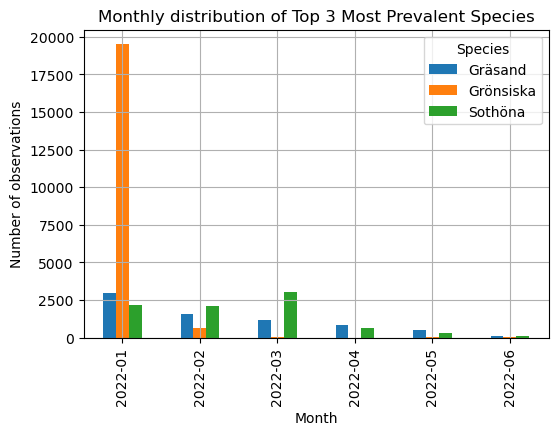

In [58]:

# transpose the dataframe and plot a barplot
grouped_df.T.plot(kind='bar', figsize=(6, 4))
plt.title('Monthly distribution of Top 3 Most Prevalent Species')
plt.xlabel('Month')
plt.ylabel('Number of observations')
plt.legend(title='Species')
plt.grid(True)
plt.show()
    


### Question - What are the rarest species?

Consider 1 or 0 number observed species.

In [63]:

print(f'The rarest species: ')

species_count_df_ordered[species_count_df_ordered['Antal']<=1.0]

The rarest species: 


,Artnamn,Antal
159,Trädlärka,1.0
167,Vinterhämpling,1.0
169,Ägretthäger,1.0
164,Varfågel,1.0
1,Bivråk,1.0
70,Lappsparv,1.0
11,Bändelkorsnäbb,1.0
135,Strömstare,1.0
28,Gravand,1.0
97,Rosenfink,1.0


####

## Further investigations


### Question - What is the average number of birds spotted per observation in different municipalities?







Determine the number of observed birds in total at each municipality.

In [69]:
birds_in_municipality = df_artport.groupby('Kommun', as_index=False)['Antal'].sum()

birds_in_municipality.sort_values(by='Antal', ascending=False)

,Kommun,Antal
3,Stockholm,92561.0
2,Solna,15361.0
1,Sollentuna,6434.0
0,Lidingö,1439.0


Determine the number of observations done in each municipality, excluding those where Antal is NaN.

In [78]:

# Exclude observations where value of Antal is NaN
df_artport_clean = df_artport[df_artport['Antal'].notna()]

df_artport_result = df_artport_clean['Kommun'].value_counts().reset_index()

df_artport_result.columns = ['Kommun', 'AntalObs']

df_artport_result


,Kommun,AntalObs
0,Stockholm,13526
1,Solna,3755
2,Sollentuna,2152
3,Lidingö,154


The average number of birds observed per observation period.

In [84]:


birds_municipal = birds_in_municipality.sort_values(by='Kommun')

df_artport_result_sorted=df_artport_result.sort_values(by='Kommun')

birds_municipal['AntalObs']= df_artport_result_sorted['AntalObs'].values

birds_municipal['medelAntal']= (birds_municipal['Antal']/birds_municipal['AntalObs']).round(2)

birds_municipal


,Kommun,Antal,AntalObs,medelAntal
0,Lidingö,1439.0,154,9.34
1,Sollentuna,6434.0,2152,2.99
2,Solna,15361.0,3755,4.09
3,Stockholm,92561.0,13526,6.84


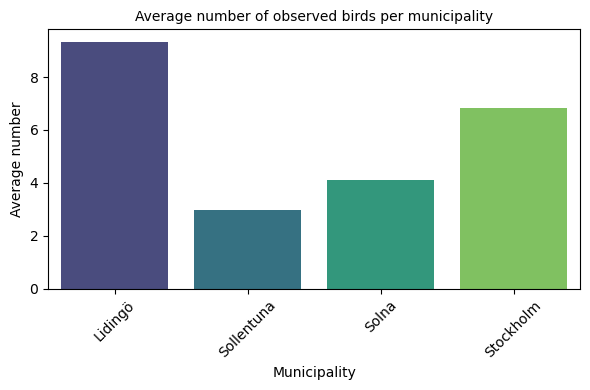

In [137]:
# Filter warnings
warnings.filterwarnings("ignore")

# Create a barplot
plt.figure(figsize=(6, 4))
sns.barplot(data=birds_municipal, x='Kommun', y='medelAntal', palette='viridis')

plt.title('Average number of observed birds per municipality', fontsize=10)
plt.xlabel('Municipality', fontsize=10)
plt.ylabel('Average number', fontsize=10)
plt.xticks(rotation=45) 
plt.tight_layout()

plt.show()



In [111]:


antal_rapport_municipal =df_artport_clean.groupby('Kommun')['Rapportör'].nunique().reset_index()

antal_rapport_municipal

,Kommun,Rapportör
0,Lidingö,10
1,Sollentuna,10
2,Solna,215
3,Stockholm,278




There are more birdwatchers in stockhom municipality. This should be expected since it is a big municipality. However more birds are seen in Lidingö on average. It would have been interesting to calculate the percentage of the population that engages in birdwatching in each municipality, assuming each birdwatcher sticks to their own municipality.

####



### Question - On which weekdays were observations made?

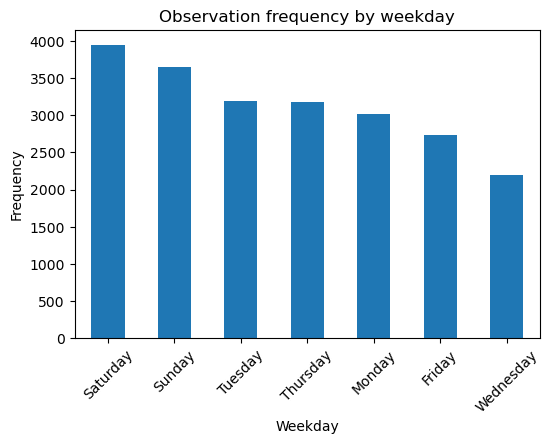

In [133]:

# Create a new column to extract weekday for the observation
df_artport['Veckodag'] = df_artport['Startdatum'].dt.day_name()

# Calculate the frequency of observation made by observer per weekday
weekday_freq = df_artport['Veckodag'].value_counts()

# Create plot
plt.figure(figsize=(6,4))
weekday_freq.plot(kind='bar')

plt.title('Observation frequency by weekday')
plt.xlabel('Weekday')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.show()



Most observations were made during the weekend, as expected, and slightly fewer on weekdays. Wednesdays seem to be the least popular day for birdwatching.

### Question - At what times of the day were observations made?

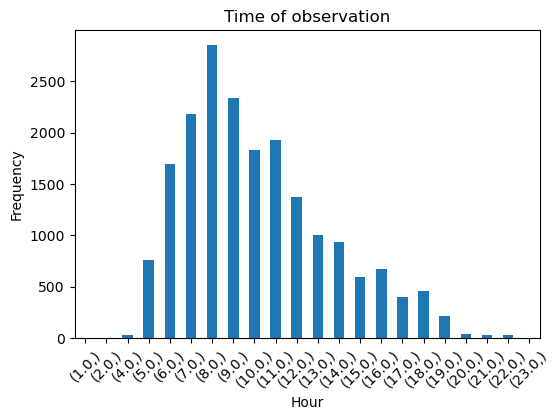

In [150]:

# Create new column for storing hour of observation
df_artport['Starttimme'] = df_artport['Starttid'].dt.hour

# Count the frequency of each hour
hour_freq = df_artport[['Starttimme']].value_counts().sort_index()

# Create plot
plt.figure(figsize=(6,4))
hour_freq.plot(kind='bar')

plt.title('Time of observation')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.show()


Early mornings are the best time for birdwatching, as birds are most active and easier to observe during this time.

### 1.3 Predicting strokes

####


In [156]:

# Read data
df_strokes = pd.read_csv('stroke-data.csv')

# Display part of data
df_strokes.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


####
Get statistics about variables of the type float

In [159]:
df_strokes[['age', 'avg_glucose_level', 'bmi']].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [161]:

#check amount of missing data for the different variables
df_strokes.isna().sum()



id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


####


### Explore data

Age and heart disease related to stroke have been examined in previous exercise.
Further variables to examine are the following:



### Question - How is hypertension related to stroke?

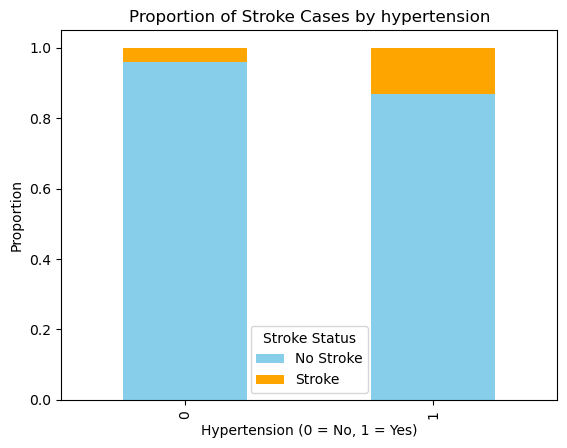

In [155]:


#Group data to get the proportional distribution of stroke status for those with heart disease 
stroke_counts = df_strokes.groupby('hypertension')['stroke'].value_counts(normalize=True).unstack()

# Plot a bar diagram
stroke_counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title("Proportion of Stroke Cases by hypertension")
plt.xlabel("Hypertension (0 = No, 1 = Yes)")
plt.ylabel("Proportion")
plt.legend(["No Stroke", "Stroke"], title="Stroke Status")
plt.show()




A larger proportion among people with hypertension had stroke. 

#


### Question - How is smoking status related to stroke?

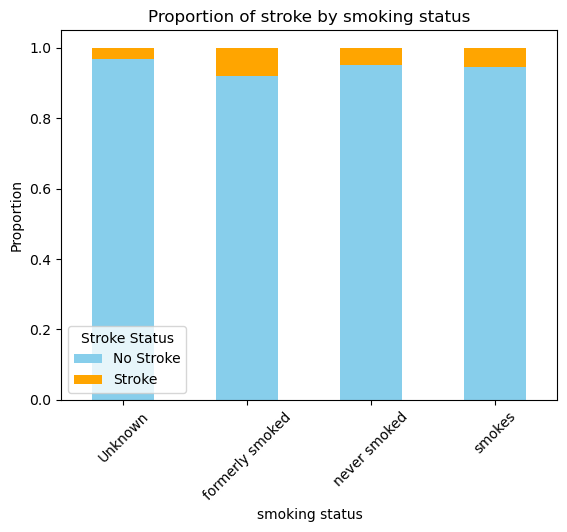

In [162]:

#Group data to get the proportional distribution of stroke status for those with heart disease 
stroke_counts = df_strokes.groupby('smoking_status')['stroke'].value_counts(normalize=True).unstack()

# Plot a bar diagram
stroke_counts.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title("Proportion of stroke by smoking status")
plt.xlabel("smoking status")
plt.ylabel("Proportion")
plt.xticks(rotation=45)
plt.legend(["No Stroke", "Stroke"], title="Stroke Status")
plt.show()



It seems that formerly smoking status has some effect regarding the risk of getting stroke
which makes it plausible to suspect that unknown status is probably a smoking status.
In that case it appears that smoking/formerly smoked status does effect the risk of getting stroke to some degree.
However, there might be a third factor related to smoking that might explain the result, for instance it is possible that smokers live a less healthy lifestyle in general.

#

### Question - How is average glucose level related to stroke?

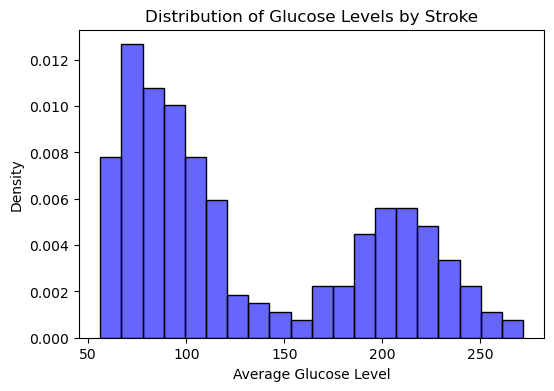

In [197]:

stroke_data = df_strokes[df_strokes['stroke'] == 1]

plt.figure(figsize=(6, 4))

# Histogram for patients with stroke
sns.histplot(stroke_data['avg_glucose_level'], bins=20, color='blue', alpha=0.6, label='Stroke', stat='density')

plt.title('Distribution of Glucose Levels by Stroke')
plt.xlabel('Average Glucose Level')
plt.ylabel('Density')
plt.show()

# Filter warnings
warnings.filterwarnings("ignore")



Too low or too high level of average glucose appears to increase the risk of getting stroke.

#

## Part 2 - Data preparation

#### Cleaning data 

Handle missing values in the dataset and convert all relevant cells to numbers.

In [174]:
# Read data from file
df_cellPhones = pd.read_csv('cell_phones_total.csv')

# Make sure to display all columns
pd.set_option('display.max_columns', 100)

df_cellPhones


,iso-3,1960,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,ABW,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,20,NaN,NaN,1720,3000,3400,5380,12k,15k,53k,61.8k,70k,98.4k,103k,109k,114k,121k,128k,132k,NaN,135k,139k,140k,141k,NaN,NaN,NaN,NaN
1,AFG,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25k,200k,600k,1.2M,2.52M,4.67M,7.9M,10.5M,10.2M,13.8M,15.3M,16.8M,18.4M,19.7M,21.6M,23.9M,22M,22.6M
2,AGO,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1100,1820,1990,3300,7050,9820,24k,25.8k,75k,140k,350k,740k,1.61M,3.05M,4.96M,6.77M,8.11M,9.4M,12.1M,12.8M,13.3M,14.1M,13.9M,13M,13.3M,13.3M,14.8M
3,ALB,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2300,3300,5600,11k,29.8k,393k,851k,1.1M,1.26M,1.53M,1.91M,2.32M,1.86M,2.46M,2.69M,3.1M,3.5M,3.69M,3.36M,3.4M,3.37M,3.63M,2.71M,2.63M
4,AND,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,770,780,784,2830,5490,8620,14.1k,20.6k,23.5k,29.4k,32.8k,51.9k,58.4k,64.6k,69k,63.5k,64.2k,64.5k,65.5k,65k,63.9k,63.9k,66.2k,71.3k,76.1k,80.3k,82.6k,87.9k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,562k,562k,562k,562k,562k,562k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
210,YEM,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1550,5170,8190,8250,8810,12.2k,16.1k,27.7k,32k,148k,487k,675k,1.48M,2.28M,2.98M,4.35M,6.45M,8.31M,11.1M,11.7M,13.9M,16.8M,17.1M,15M,16.4M,15.4M,15.3M,NaN
211,ZAF,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,3980,5680,7100,12.5k,40k,340k,535k,953k,1.84M,3.34M,5.19M,8.34M,10.8M,13.7M,16.9M,20.8M,34M,39.7M,42.3M,45M,46.4M,50.4M,64M,68.4M,76.9M,79.3M,88M,82.4M,88.5M,92.4M,97M
212,ZMB,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1550,2720,4550,8260,28.2k,98.9k,121k,139k,241k,464k,950k,1.66M,2.64M,3.54M,4.41M,5.45M,8.16M,10.5M,10.4M,10.1M,11.6M,12M,13.4M,15.5M,17.2M


In [178]:
# Check columns for missing values
missing_values = df_cellPhones.isna().sum()

# Print('Columns with missing values:')
print(missing_values)


iso-3      0
1960      14
1965      14
1966     214
1967     214
1968     214
1969     214
1970      14
1971     214
1972     214
1973     214
1974     214
1975      14
1976      14
1977      14
1978      14
1979      14
1980      14
1981      15
1982      15
1983      16
1984      18
1985      19
1986      18
1987      20
1988      19
1989      21
1990       7
1991      18
1992      16
1993      16
1994      16
1995      14
1996      13
1997      14
1998      12
1999      11
2000      10
2001      10
2002       8
2003       8
2004       7
2005      10
2006      13
2007      10
2008      12
2009      10
2010       7
2011      11
2012       7
2013      10
2014       9
2015       7
2016      12
2017      10
2018      32
2019      71
dtype: int64


In [196]:
#fill in missing values (replaces all NaN, None or pd.NA) 
df_cellPhones.fillna(value=pd.NA, inplace=True)


# Remove columns with all missing values since no country has data for the specific year
df_cellPhones.dropna(axis="columns", how="all", inplace=True)

# Remove rows with all missing values
df_cellPhones.dropna(axis="rows", how="all", inplace=True)

#convert cell values to a float or NaN
def convert_to_number(n):
    
    if isinstance(n, str):
        
        n = n.strip()
            
        if n.endswith('k'):
            return float(n[:-1]) * 1e3
        
        elif n.endswith('M'):
            return float(n[:-1]) * 1e6
        
        elif n.endswith('B'):
             return float(n[:-1]) * 1e9
        
        elif n == '':
            return np.nan
        else:
            float(n)
    elif pd.isnull(n):
        return np.nan
    else:
        n

#select columns representig years
year_columns = df_cellPhones.columns.drop('iso-3')

#loop through columns and convert entries to float
for col in year_columns:
    df_cellPhones[col] = df_cellPhones[col].apply(convert_to_number)
    

# Make sure all data is numeric
df_cellPhones[year_columns] = df_cellPhones[year_columns].apply(pd.to_numeric, errors='coerce')

# Select columns to display
selected_columns = ['iso-3', '2015', '2016', '2017', '2018', '2019']

# Select year columns 1960 - 1980 where no available cellphones
columns_to_fill = [col for col in df_cellPhones.columns if col.isdigit() and int(col)<= 1980]

#fill all NaN entries with 0 for the selected columns 
df_cellPhones[columns_to_fill] = df_cellPhones[columns_to_fill].fillna(0)

# Sort values by year 2015 in descending order
df_cellPhones = df_cellPhones[selected_columns].sort_values(by='2015', ascending=False)

# Reset row index
df_cellPhones.reset_index(drop=True, inplace=True)


df_cellPhones[selected_columns].head()   


,iso-3,2015,2016,2017,2018,2019
0,CHN,1.290000e+09,1.360000e+09,1.470000e+09,1.650000e+09,1.730000e+09
1,IND,1.000000e+09,1.130000e+09,1.170000e+09,1.180000e+09,1.150000e+09
2,USA,3.820000e+08,3.960000e+08,4.000000e+08,4.220000e+08,NaN
3,IDN,3.390000e+08,3.860000e+08,4.350000e+08,3.190000e+08,3.450000e+08
4,BRA,2.580000e+08,2.440000e+08,2.180000e+08,2.070000e+08,NaN
